In [1]:
%matplotlib inline
import numpy as np
import os.path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Loading and Cleaning with Pandas

In [2]:
def start_timer():
    global start_timer_timestamp
    start_timer_timestamp = datetime.datetime.now()

def stop_timer():
    stop_timestamp = datetime.datetime.now()
    tm_msec = (stop_timestamp - start_timer_timestamp).total_seconds() * 1000
    print(f'Time spent: {tm_msec} msec')  

In [3]:
# start_timer()
# review_cols = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool']
# with open('dataset/review.json', 'r', encoding="utf-8") as review:
#     review_data = [json.loads(line) for line in review]
#     review_df = pd.DataFrame(review_data, columns=review_cols)
#     print("Loaded Reviews. Total ", review_df.size, " records")
# print('loaded review_df')
# stop_timer()

Loaded Reviews. Total  33158279  records
loaded review_df
Time spent: 180980.0 msec


In [ ]:
# start_timer()   
# with open('dataset/business.json', 'r', encoding="utf-8") as business:
#     business_data = [json.loads(line) for line in business]
#     business_df = pd.DataFrame(business_data)
#     print("Loaded Businesses. Total ", business_df.size, " records")
# print('loaded business_df')
# stop_timer()

Loaded Businesses. Total  2349585  records
loaded business_df
Time spent: 11280.0 msec


In [ ]:
# user_cols = ["user_id", "review_count", "average_stars", "cool", "compliment_cool", "compliment_cute", 
#              "compliment_funny", "compliment_hot", "compliment_list",
#             "compliment_more", "compliment_note", "compliment_photos", 
#             "compliment_plain" , "compliment_profile", "compliment_writer", "fans", 
#             "funny", "useful", "yelping_since"]
# start_timer()
# with open('dataset/user.json', 'r', encoding="utf-8") as user:
#     user_data = [json.loads(line) for line in user]
#     user_df = pd.DataFrame(user_data, columns=user_cols)
#     print("Loaded Users. Total ", user_df.size, " records")
# print('loaded user_df')
# stop_timer()

In [3]:
def load_review_df():
    global review_df
    start_timer()
    if(os.path.isfile('dataset/review_df.csv')):
        print('Loading reviews from csv')
        review_df = pd.read_csv('dataset/review_df.csv', index_col=0)
    else:
        review_cols = ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool']
        with open('dataset/review.json', 'r', encoding="utf-8") as review:
            review_data = [json.loads(line) for line in review]
            review_df = pd.DataFrame(review_data, columns=review_cols)
    print("Loaded Reviews. Total ", review_df.size, " records")
    stop_timer()

def load_user_df():
    start_timer()
    global user_df
    if(os.path.isfile('dataset/user_df.csv')):
        print('Loading user_df from csv')
        user_df = pd.read_csv('dataset/user_df.csv', encoding="utf-8", index_col=0)
    else:
        user_cols = ["user_id", "review_count", "average_stars", 
    #                 "cool", "compliment_cool", "compliment_cute", 
    #                 "compliment_funny", "compliment_hot", "compliment_list",
    #                 "compliment_more", "compliment_note", "compliment_photos", 
    #                 "compliment_plain" , "compliment_profile", "compliment_writer", "fans", 
    #                 "funny", "useful", 
            "yelping_since"]
        with open('dataset/user.json', 'r', encoding="utf-8") as user:
            user_data = [json.loads(line) for line in user]
            user_df = pd.DataFrame(user_data, columns=user_cols)
    print("Loaded Users. Total ", user_df.size, " records")
    stop_timer()

In [4]:
load_user_df()

Loading user_df from csv
Loaded Users. Total  22483878  records
Time spent: 3167.0 msec


In [5]:
load_review_df()

Loading reviews from csv
Loaded Reviews. Total  33158279  records
Time spent: 10759.0 msec


In [7]:
def load_restaurants_df():
    global business_df, restaurant_df_merged
    start_timer()
    if(os.path.isfile('restaurant_df_merged_az.csv.csv')):
        print('Loading restaurant_df_merged from csv')
        restaurant_df_merged = pd.read_csv('restaurant_df_merged_az.csv.csv', index_col=0, sep='\t', encoding='utf-8')
    else:
        with open('dataset/business.json', 'r', encoding="utf-8") as business:
            business_data = [json.loads(line) for line in business]
            business_df = pd.DataFrame(business_data)
    print("Loaded Businesses. Total ", business_df.size, " records")
    stop_timer()

In [8]:
load_restaurants_df()

Loaded Businesses. Total  2349585  records
Time spent: 5295.529 msec


In [9]:
review_df.head(3)

,review_id,user_id,business_id,review_stars,review_useful,review_funny,review_cool
0,VfBHSwC5Vz_pbFluy07i9Q,cjpdDjZyprfyDG3RlkVG3w,uYHaNptLzDLoV_JZ_MuzUA,5,0,0,0
1,3zRpneRKDsOPq92tq7ybAA,bjTcT8Ty4cJZhEOEo01FGA,uYHaNptLzDLoV_JZ_MuzUA,3,0,0,0
2,ne5WhI1jUFOcRn-b-gAzHA,AXgRULmWcME7J6Ix3I--ww,uYHaNptLzDLoV_JZ_MuzUA,3,0,0,0


In [10]:
business_df.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON


In [11]:
user_df.head(3)

,user_id,review_count,average_stars,cool,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,fans,funny,useful,yelping_since
0,lsSiIjAKVl-QRxKjRErBeg,272,3.80,16856,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,209,16605,17019,2010-07-13
1,om5ZiponkpRqUNa3pVPiRg,2559,3.94,40110,1556,211,1556,1285,101,134,1295,162,2134,74,402,835,10882,83681,2006-01-18
2,-lGwMGHMC_XihFJNKCJNRg,277,4.72,55,15,1,15,5,0,1,11,8,20,0,1,17,4,45,2014-10-31


In [13]:
print(business_df.shape)
print(business_df.dtypes)

(156639, 15)
address          object
attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
neighborhood     object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object


In [14]:
print(user_df.shape)
print(user_df.dtypes)

(1183362, 19)
user_id                object
review_count            int64
average_stars         float64
cool                    int64
compliment_cool         int64
compliment_cute         int64
compliment_funny        int64
compliment_hot          int64
compliment_list         int64
compliment_more         int64
compliment_note         int64
compliment_photos       int64
compliment_plain        int64
compliment_profile      int64
compliment_writer       int64
fans                    int64
funny                   int64
useful                  int64
yelping_since          object
dtype: object


In [15]:
print(review_df.shape)
print(review_df.dtypes)

(4736897, 7)
review_id        object
user_id          object
business_id      object
review_stars      int64
review_useful     int64
review_funny      int64
review_cool       int64
dtype: object


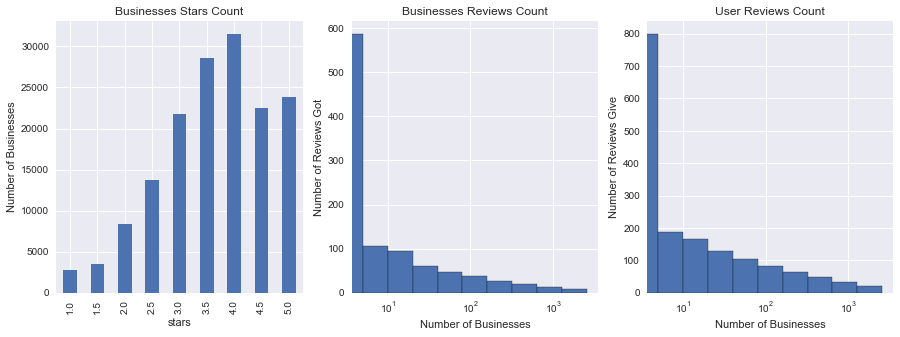

In [16]:
fig = plt.figure(figsize = (15,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

business_df.groupby('stars').size().plot(kind='bar', ax = ax0)
ax0.set_title('Businesses Stars Count')
ax0.set_ylabel('Number of Businesses')

business_review_count = business_df.groupby('review_count').size()
bins=[0, 5, 10, 20, 40, 80,160, 320, 640, 1280, 2560]
ax1.hist(business_review_count, bins=bins, edgecolor="k")
ax1.set_title('Businesses Reviews Count')
ax1.set_xlabel('Number of Businesses')
ax1.set_ylabel('Number of Reviews Got')
ax1.set_xscale('log')

business_review_count = user_df.groupby('review_count').size()
bins=[0, 5, 10, 20, 40, 80,160, 320, 640, 1280, 2560]
ax2.hist(business_review_count, bins=bins, edgecolor="k")
ax2.set_title('User Reviews Count')
ax2.set_xlabel('Number of Businesses')
ax2.set_ylabel('Number of Reviews Give')
ax2.set_xscale('log')

fig.savefig('plot1.png')

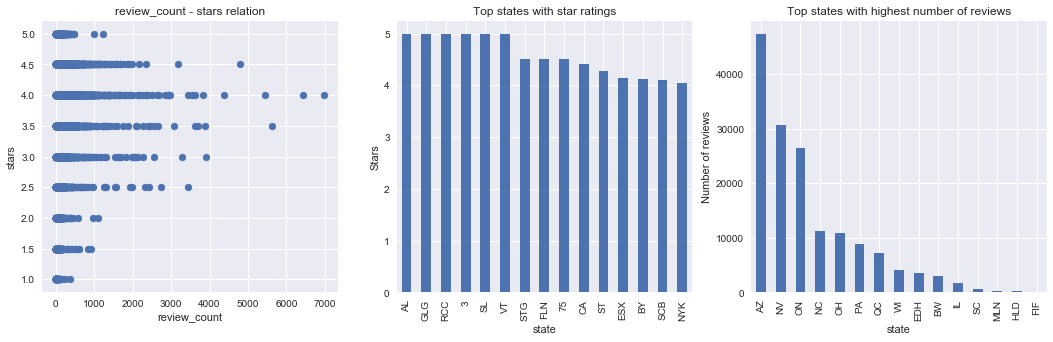

In [17]:
fig = plt.figure(figsize = (18,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

ax0.scatter(business_df['review_count'], business_df['stars'])
ax0.set_title('review_count - stars relation')
ax0.set_xlabel('review_count')
ax0.set_ylabel('stars')

business_df[['state', 'stars']].groupby('state')['stars'].agg('mean').sort_values(ascending = False).head(15).plot(kind = 'bar', ax=ax1)
ax1.set_title('Top states with star ratings')
ax1.set_ylabel('Stars')

business_df[['state', 'stars']].groupby('state')['stars'].count().sort_values(ascending = False).head(15).plot(kind = 'bar', ax=ax2)
ax2.set_title('Top states with highest number of reviews')
ax2.set_ylabel('Number of reviews')

fig.savefig('plot2.png')

### Data Selection/Cleaning

In [18]:
# First of all let's filter out closed businesses 
open_business_df = business_df[business_df['is_open'] == 1]
print("After removing businesses that are closed we left with ", open_business_df.size, " records")

# Next, filter out all none restaurant businesses, because we only care about restaurants
restaurant_df = open_business_df[open_business_df['categories'].apply(lambda x: 'Restaurants' in x)]
print("Open restaurant business records: ", restaurant_df.size)

After removing businesses that are closed we left with  1983930  records
Open restaurant business records:  579855


In [19]:
# We need to process hours column to factor out time
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def get_hours(hours_df):
    hours = []
    
    for s in hours_df:
        open_list = []
        close_list = []
        
        for d in days:
            opn = 0.0
            cls = 0.0
            if d in s:
                hourz = s[d].split('-')
                hrs1 = hourz[0].split(':')
                hrs2 = hourz[1].split(':')

                opn = float(hrs1[0]) + float(hrs1[1])/60
                cls = float(hrs2[0]) + float(hrs2[1])/60

                # handle overnight hours
                if (opn > cls):
                    cls += 24

            open_list.append(opn)
            close_list.append(cls)
        hours.append((open_list, close_list))
    return hours

restaurant_hours = get_hours(restaurant_df['hours'])

In [20]:
print(len(restaurant_hours))
print(len(restaurant_df['hours']) == len(restaurant_hours))

# Work in progress on adding hour columns before training

38657
True


In [21]:
print(restaurant_df.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars', 'state'], dtype='object')


In [22]:
# Append `business_` and `review_` prefix to all columns in restaurants and reviews dataframe 
# to distinguish columns after merge
restaurant_df.columns = ['business_' + str(col) for col in restaurant_df.columns]
review_df.columns = ['review_' + str(col) for col in review_df.columns]
# rename *_id columns back 
restaurant_df.rename(columns={"business_business_id": "business_id"}, inplace=True)
review_df.rename(columns={"review_business_id": "business_id", 
                          "review_review_id": "review_id", 
                          "review_user_id": "user_id"}, inplace=True)

In [23]:
# yelp_reviews.copy().drop('review_text', axis=1).to_csv('dataset/merged_df.csv')

In [24]:
# We need to process hours column to factor out time
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
open_close = ['_open', '_close']

def get_hours(df):
    hours = []
    for index, row in df.iterrows():
        record = {'business_id': row['business_id']}
        s = row['business_hours']
        for d in days:
            opn = 0.0
            cls = 0.0
            if d in s:
                hourz = s[d].split('-')
                hrs1 = hourz[0].split(':')
                hrs2 = hourz[1].split(':')

                opn = float(hrs1[0]) + float(hrs1[1])/60
                cls = float(hrs2[0]) + float(hrs2[1])/60

                # handle overnight hours
                if (opn > cls):
                    cls += 24

            record[str(d) + '_open'] = opn
            record[str(d) + '_close'] = cls
            
        hours.append(record)
    return hours

restaurant_hours = get_hours(restaurant_df[['business_id', 'business_hours']])

In [25]:
restaurant_hours_df = pd.DataFrame(restaurant_hours)
restaurant_df_merged = restaurant_df.merge(restaurant_hours_df, on=['business_id'])
restaurant_df_merged.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0
1,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5
2,4759 Liberty Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0


In [26]:
# Next let's take a look at all categories that has 'Restaurant'
categories = set()
restaurant_df_merged['business_categories'].apply(lambda r: categories.update(r))
len(categories)

635

In [27]:
def process_categories(df):
    records = []
    for index, row in df.iterrows():
        record = {'business_id': row['business_id']}
        current_cats = row['business_categories']
        for c in current_cats:
            record[c] = 1
        records.append(record)
    return records

b_cats = process_categories(restaurant_df_merged)

In [28]:
cats_df = pd.DataFrame(b_cats).fillna(0)


In [29]:
print(np.array(cats_df.columns))


['Acai Bowls' 'Accessories' 'Accountants' 'Active Life' 'Acupuncture'
 'Adult' 'Adult Education' 'Adult Entertainment' 'Advertising' 'Afghan'
 'African' 'Air Duct Cleaning' 'Aircraft Repairs' 'Airport Lounges'
 'Airport Shuttles' 'Airports' 'Airsoft' 'Alsatian' 'Amateur Sports Teams'
 'American (New)' 'American (Traditional)' 'Amusement Parks'
 'Animal Shelters' 'Antiques' 'Apartments' 'Appliances'
 'Appliances & Repair' 'Aquarium Services' 'Aquariums' 'Arabian' 'Arcades'
 'Argentine' 'Armenian' 'Art Classes' 'Art Galleries' 'Art Schools'
 'Arts & Crafts' 'Arts & Entertainment' 'Asian Fusion' 'Australian'
 'Austrian' 'Auto Customization' 'Auto Detailing' 'Auto Glass Services'
 'Auto Insurance' 'Auto Parts & Supplies' 'Auto Repair' 'Auto Upholstery'
 'Automotive' 'Baby Gear & Furniture' 'Baden' 'Bagels' 'Bakeries'
 'Bangladeshi' 'Bankruptcy Law' 'Banks & Credit Unions' 'Bar Crawl'
 'Barbeque' 'Barbers' 'Bars' 'Bartenders' 'Bartending Schools' 'Basque'
 'Batting Cages' 'Bavarian' 'Beach 

In [30]:
restaurant_df_merged = restaurant_df_merged.merge(cats_df, on=['business_id'])
restaurant_df_merged.head(3)

,business_address,business_attributes,business_id,business_categories,business_city,business_hours,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),...,Travel Services,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,9616 E Independence Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190 E Dallas Rd,"{'RestaurantsAttire': 'casual', 'Alcohol': 'no...",iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,"{'Monday': '11:30-22:00', 'Tuesday': '11:30-22...",1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4759 Liberty Ave,"{'RestaurantsTableService': True, 'GoodForMeal...",HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,"{'Sunday': '8:00-12:00', 'Tuesday': '8:00-12:0...",1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
restaurant_df_merged.isnull().values.any()

False

In [32]:
def process_attributes(df):
    records = []
    for index, row in df.iterrows():
        attrs = row['business_attributes']
        attrs['business_id'] = row['business_id']
        records.append(attrs)
    return records

b_attrs = process_attributes(restaurant_df_merged)

In [33]:
pd.DataFrame(b_attrs).head(5)

,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,business_id
0,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,False,NaN,NaN,NaN,False,False,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,True,True,"{'dj': False, 'background_music': False, 'no_m...",average,NaN,False,casual,NaN,False,True,2.0,False,False,True,NaN,NaN,free,SDMRxmcKPNt1AHPBKqO64Q
1,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iFEiMJoEqyB9O8OUNSdLzA
2,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': True, 'validated':...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,loud,NaN,False,casual,NaN,False,False,1.0,False,True,True,NaN,NaN,no,HmI9nhgOkrXlUr6KZGZZew
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,average,NaN,True,casual,NaN,False,True,2.0,True,NaN,True,NaN,NaN,free,qnpvw-uQyRn9nlClWFK9aA
4,NaN,NaN,full_bar,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,average,NaN,False,casual,NaN,False,True,2.0,True,True,True,NaN,True,no,TXiEgINSZ75d3EtvLvkc4Q


In [34]:
restaurant_df_merged = restaurant_df_merged.drop(['business_attributes', 'business_hours', 'business_categories'], axis=1)

In [35]:
restaurant_df_merged.head()

,business_address,business_id,business_city,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Shelters,Antiques,...,Travel Services,Trinidadian,Truck Rental,Turkish,Tuscan,Udon,Ukrainian,Used,Uzbek,Vacation Rentals,Vape Shops,Vegan,Vegetarian,Vehicle Wraps,Venezuelan,Venues & Event Spaces,Veterinarians,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vintage & Consignment,Vinyl Records,Vinyl Siding,Vitamins & Supplements,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,9616 E Independence Blvd,SDMRxmcKPNt1AHPBKqO64Q,Matthews,1,35.135196,-80.714683,Applebee's,,28105,21,2.0,NC,25.0,11.0,24.0,11.0,25.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,24.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,190 E Dallas Rd,iFEiMJoEqyB9O8OUNSdLzA,Stanley,1,35.355085,-81.087268,China Garden,,28164,3,3.0,NC,22.5,11.5,22.0,11.5,22.5,11.5,22.0,11.5,22.0,11.5,22.0,11.5,22.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4759 Liberty Ave,HmI9nhgOkrXlUr6KZGZZew,Pittsburgh,1,40.461350,-79.948113,Rocky's,Bloomfield,15224,15,3.0,PA,0.0,0.0,0.0,0.0,12.0,8.0,12.0,8.0,12.0,8.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7070 Saint Barbara Boulevard,qnpvw-uQyRn9nlClWFK9aA,Mississauga,1,43.639236,-79.716199,Wild Wing,Meadowvale Village,L5W 0E6,6,2.5,ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4502 East Towne Blvd,TXiEgINSZ75d3EtvLvkc4Q,Madison,1,43.128034,-89.307157,Red Lobster,,53704,45,3.0,WI,23.0,11.0,22.0,11.0,23.0,11.0,22.0,11.0,22.0,11.0,22.0,11.0,22.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Limit the dataset to business_city == 'Phoenix'
restaurant_df_merged = restaurant_df_merged[restaurant_df_merged.business_city == 'Phoenix']
yelp_reviews = None
restaurant_df_merged_az = None

In [37]:
restaurant_df_merged.columns

Index(['business_address', 'business_id', 'business_city', 'business_is_open', 'business_latitude', 'business_longitude', 'business_name', 'business_neighborhood', 'business_postal_code', 'business_review_count',
       ...
       'Wine Bars', 'Wine Tasting Room', 'Wine Tours', 'Wineries', 'Wok', 'Women's Clothing', 'Wraps', 'Yelp Events', 'Yoga', 'Zoos'], dtype='object', length=661)

In [38]:
# restaurant_df_merged.to_csv('dataset/restaurant_df_merged_az.csv', sep='\t', encoding='utf-8')

In [39]:
review_df.to_csv('dataset/review_df.csv', sep='\t', encoding='utf-8')

In [40]:
# Limit the dataset to business_city == 'Phoenix'
yelp_reviews = pd.merge(pd.merge(restaurant_df_merged, review_df, on='business_id', how='left'),
              user_df, on='user_id', how='left')
yelp_reviews.head(3)
print("Merged data frame contains ", yelp_reviews.columns.size, " columns:\n\n", yelp_reviews.columns.tolist())

Merged data frame contains  685  columns:

 ['business_address', 'business_id', 'business_city', 'business_is_open', 'business_latitude', 'business_longitude', 'business_name', 'business_neighborhood', 'business_postal_code', 'business_review_count', 'business_stars', 'business_state', 'Friday_close', 'Friday_open', 'Monday_close', 'Monday_open', 'Saturday_close', 'Saturday_open', 'Sunday_close', 'Sunday_open', 'Thursday_close', 'Thursday_open', 'Tuesday_close', 'Tuesday_open', 'Wednesday_close', 'Wednesday_open', 'Acai Bowls', 'Accessories', 'Accountants', 'Active Life', 'Acupuncture', 'Adult', 'Adult Education', 'Adult Entertainment', 'Advertising', 'Afghan', 'African', 'Air Duct Cleaning', 'Aircraft Repairs', 'Airport Lounges', 'Airport Shuttles', 'Airports', 'Airsoft', 'Alsatian', 'Amateur Sports Teams', 'American (New)', 'American (Traditional)', 'Amusement Parks', 'Animal Shelters', 'Antiques', 'Apartments', 'Appliances', 'Appliances & Repair', 'Aquarium Services', 'Aquariums', '

In [41]:
yelp_reviews_az = yelp_reviews[yelp_reviews.business_city == 'Phoenix']

In [ ]:
# yelp_reviews_az['yelping_since'] = 
pd.to_datetime(yelp_reviews_az['yelping_since'])

In [51]:
yelp_reviews_az['yelping_since'] =  pd.DatetimeIndex(yelp_reviews_az['yelping_since']).year

In [52]:
# 100000000000 can be removed later on
# yelp_since_sec = pd.to_datetime(yelp_reviews_az['yelping_since']).astype(int).values/100000000000
# len(yelp_since_sec)

NameError: name 'yelp_since_sec' is not defined

In [ ]:
earlist = yelp_since_sec.min()
yelp_reviews_az['yelp_since'] = yelp_since_sec / earlist

In [53]:
yelp_reviews_az.head()

,business_address,business_id,business_city,business_is_open,business_latitude,business_longitude,business_name,business_neighborhood,business_postal_code,business_review_count,business_stars,business_state,Friday_close,Friday_open,Monday_close,Monday_open,Saturday_close,Saturday_open,Sunday_close,Sunday_open,Thursday_close,Thursday_open,Tuesday_close,Tuesday_open,Wednesday_close,Wednesday_open,Acai Bowls,Accessories,Accountants,Active Life,Acupuncture,Adult,Adult Education,Adult Entertainment,Advertising,Afghan,African,Air Duct Cleaning,Aircraft Repairs,Airport Lounges,Airport Shuttles,Airports,Airsoft,Alsatian,Amateur Sports Teams,American (New),American (Traditional),Amusement Parks,Animal Shelters,Antiques,...,Waffles,Walking Tours,Water Heater Installation/Repair,Water Stores,Waxing,Web Design,Wedding Chapels,Wedding Planning,Weight Loss Centers,Whiskey Bars,Wholesale Stores,Wholesalers,Wigs,Windows Installation,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Wok,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos,review_id,user_id,review_review_stars,review_review_useful,review_review_funny,review_review_cool,review_count,average_stars,cool,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,fans,funny,useful,yelping_since
0,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lPpkSLWP4dtlZ588PucfXg,HyU35rUgH_SxsIb0CwTdww,2,0,0,0,272,3.51,2,0,0,0,0,0,1,0,0,1,0,0,0,0,7,2014
1,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LQjc9f7oDtxD0dRc7Ez7cA,ira4RzqjC9shmZTJEk8ZAQ,4,0,0,0,146,3.84,41,6,0,6,2,0,1,6,0,4,1,1,12,11,72,2009
2,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NB3aJt6nSCVgm3nkpK8RtQ,Jvzd19Q0xvvvdvHQ4ZQNGQ,1,0,0,0,2,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015
3,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nCUh865phQuxc7Yt0tNvzw,iXGoQVfBXU0CrwrRBWXozA,3,3,1,2,327,4.30,4383,115,5,115,83,4,6,89,28,304,2,41,44,2111,4148,2010
4,"2641 N 44th St, Ste 100",01xXe2m_z048W5gcBFpoJA,Phoenix,1,33.478043,-111.98637,Five Guys,,85008,63,3.5,AZ,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IVXVNoNSN8jdLaRLUljL6w,7o8YKxNIo8yh5jkR-tJV6w,4,0,0,0,93,3.93,4,0,0,0,0,0,0,3,0,0,0,0,4,8,54,2014


In [55]:
# Split the training and testing dataset
mask = np.random.rand(len(yelp_reviews_az)) < 0.75
train_df = yelp_reviews_az[mask]
test_df = yelp_reviews_az[~mask]

In [56]:
def init_data():
    global X_train, y_train, X_test, y_test;
    X_train = train_df[['business_stars', 'average_stars', 'business_review_count',  'review_count' ,
                          'African', 'American (Traditional)' , 
                          'Vietnamese', 'Vegetarian', 
                          'Chinese' , 'Mexican', 'Indian', 
                          'Japanese', 'German',
                          'Greek', 'yelp_since']]
    y_train = train_df['review_stars']
    X_test = test_df[['business_stars', 'average_stars', 'business_review_count',  'review_count' ,
                          'African', 'American (Traditional)' , 
                          'Vietnamese', 'Vegetarian', 
                          'Chinese' , 'Mexican', 'Indian', 
                          'Japanese', 'German',
                          'Greek', 'yelp_since']]
    y_test = test_df['review_stars']

In [57]:
yelp_reviews_az.head(1000).to_csv('yelp_reviews_az.csv', sep='\t', encoding='utf-8')


### Baseline Model

In [58]:
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.metrics import r2_score

In [59]:
# Split the training and testing dataset
mask = np.random.rand(len(yelp_reviews)) < 0.75
train_df = yelp_reviews[mask]
test_df = yelp_reviews[~mask]

Index(['review_id', 'user_id', 'business_id', 'review_review_stars', 'review_review_useful', 'review_review_funny', 'review_review_cool'], dtype='object')

In [60]:
# The baseline rating is the mean over all user-business ratings
baseline_rating = np.mean(review_df['review_stars'])

x_train = train_df[['business_stars', 'average_stars']]
x_train['const'] = baseline_rating
y_train = train_df['review_stars']

x_test = test_df[['business_stars', 'average_stars']]
x_test['const'] = baseline_rating
y_test = test_df['review_stars']

KeyError: 'review_stars'

In [ ]:
model = sm.OLS(y_train, x_train)
regr = model.fit()

y_trian_hat = regr.predict(x_train)
print("R2 score for train data", r2_score(y_train, y_trian_hat))

y_test_hat = regr.predict(x_test)
print("R2 score for test data", r2_score(y_test, y_test_hat))

In [ ]:
# To predict the rating for the user that already give this business review.
user_test = train_df [train_df.user_id == 'M0cI78odeq_GKqLzk8sIrw']
x_user_test = user_test[[ 'business_stars', 'average_stars']]
x_user_test['const'] = baseline_rating
y_user_test = user_test['review_stars']

In [ ]:
y_user_test_hat = regr.predict(x_user_test)

In [ ]:
y_user_test_hat.head()

#### To recommend for the user ''M0cI78odeq_GKqLzk8sIrw", we predict the ratings for all business and then give top recommendations based on rank of ratings.

In [ ]:
one_user_test = user_df[user_df.user_id == 'M0cI78odeq_GKqLzk8sIrw']

In [ ]:
# To form a x_train dataframe, with this user data and ALL different business data.
one_user_test = pd.DataFrame(np.tile(one_user_test.values, len(business_df.index)).reshape(-1,len(one_user_test.columns)), 
                   columns=one_user_test.columns)
business_df = business_df.rename(columns={'stars': 'business_stars', 'name' : 'business_name', 'review_count': 'business_review_count'})
one_user_all_business_test = one_user_test.join(business_df)

In [ ]:
# the x_train dataframe of the user
x_one_user_all_business_test = one_user_all_business_test[['business_stars', 'average_stars']]
x_one_user_all_business_test['const'] = baseline_rating

In [ ]:
y_user_test_hat = regr.predict(x_one_user_all_business_test)
predictions_df = one_user_all_business_test
predictions_df['pred_rating'] = y_user_test_hat
predictions_df[['business_id', 'business_name', 'pred_rating']].sort_values('pred_rating', ascending=False).head(5)

### Regularized Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


In [ ]:
init_data()
X_train.columns

In [ ]:
# result dictionary
r2_dict = {'alpha': [], 'ridge':[], 'lasso':[]}

#List of Lambda (lol!) values
lol = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]

# Find R^2 scores for each model (Linear, Lasso, Ridge) while
# varying alpha value for Lasso and Ridge models.
for alpha in lol:
    r2_dict['alpha'].append(alpha)
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X_train, y_train)
    
    lasso_preds = lasso.predict(X_test)
    r2_dict['lasso'].append(r2_score(y_test, lasso_preds))
    
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)
    r2_dict['ridge'].append(r2_score(y_test, ridge_preds))

# build data frame and inspect data.
r2_df = pd.DataFrame(r2_dict)
r2_df.head()

In [ ]:
pca = PCA().fit(X_train)
print('Explained variance ratio:', pca.explained_variance_ratio_)
# look for number of principal components contributing to 90% 
# of the variance in the predictors
for i in range(X_train.shape[0]):
    if pca.explained_variance_ratio_[0:i+1].sum() > 0.9:
        n_comp = i+1
        break
n_comp

In [ ]:
pca = PCA(n_comp).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

pca_model = LogisticRegression().fit(X_train_pca, y_train)
y_train_pca = pca_model.predict(X_train_pca)
y_test_pca = pca_model.predict(X_test_pca)

R2_train_pca = pca_model.score(X_train_pca, y_train)
R2_test_pca = pca_model.score(X_test_pca, y_test)

print("Accuracy rate on TRAIN data: {:1.2f}%".format(R2_train_pca*100))
print("Accuracy rate on TEST data: {:1.2f}%".format(R2_test_pca*100))

In [ ]:
yelp_reviews_az.iloc[754]

### Matrix Factorization

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
review_df_copy = review_df.sample(100)

In [ ]:
R_df = review_df_copy.pivot(index = 'user_id', columns ='business_id', values = 'review_stars').fillna(0)
R_df.shape

In [ ]:
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [ ]:
U, sigma, Vt = svds(R_demeaned, k = 50)

In [ ]:
sigma = np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns, index = R_df.index)

In [ ]:
preds_df.head()

In [ ]:
sorted_user_predictions = preds_df.iloc[0].sort_values(ascending=False)

In [ ]:
raw_rec = pd.DataFrame(sorted_user_predictions).reset_index()

In [ ]:
preds_df.head()

In [ ]:
def recommend_business(predictions_df, user_id, business_df, original_ratings_df, num_recommendations=5):
    sorted_user_predictions = predictions_df.loc[user_id].sort_values(ascending=False)
    recommendations = (business_df.merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'business_id',
               right_on = 'business_id').
         rename(columns = {user_id: 'Predictions'}).
        sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations])
    return recommendations

In [ ]:
# Make 10 recommendations for user '-hpTrjVaUEP8MLt-LJsRig'
predictions = recommend_business(preds_df, '-hpTrjVaUEP8MLt-LJsRig', business_df, review_df, 5)
predictions

## TODO
See if we can compute r2 for matrxi factorization

#### Ensemble using Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

In [ ]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# code from Adventures in scikit-learn's Random Forest by Gregory Saunders
from itertools import product
from collections import OrderedDict

from IPython.display import *

In [ ]:
# load X_train, y_train and X_test, y_test
init_data()

In [ ]:

def ensemble(Xtrain, ytrain):
#     n_estimators is the number of trees in the forest.
# The number of features to consider when looking for the best split. 
# Here max_features is a percentage and int(max_features * n_features) features are considered at each split.
    param_dict = OrderedDict(
        n_estimators = [50, 400],
        max_features = [0.2, 0.6]
    )

    start_timer()
    results = {}
    estimators= {}
    for n, f in product(*param_dict.values()):
        params = (n, f)
        print(f'Creating RandomForestRegressor using following {n} estimators and {f}% max features: ')
        est = RandomForestRegressor(oob_score=True, 
                                    n_estimators=n, max_features=f, n_jobs=-1)
        est.fit(Xtrain, ytrain)
        results[params] = est.oob_score_
        estimators[params] = est
    print(results)
    outparams = max(results, key = results.get)
    stop_timer()
    print(outparams)
    
    # get the regressor corresponding to the outparams
    rf1 = estimators[outparams]
    return rf1


In [ ]:
# Run the random forest regression on the train and test dataset
rf1 = ensemble(X_train, y_train)

In [ ]:
# Compute the R squared on training and test datasets
print('Train R-squared using RandomForestRegression is:', rf1.score(X_test, y_test))
print('Test R-squared using RandomForestRegression is:', rf1.score(X_train, y_train))

In [ ]:
# Show Top-25 most important features
features = list(Xtrain.columns)
sns.set_context("poster")
pd.Series(rf1.feature_importances_, index=features).nlargest(n=25).sort_values().plot(kind="barh") 

In [ ]:
# Predict the rating using the random forest regressor:
rf1.predict()

### EDA and revised project statement

#### 1. Description of the data

3 of the 6 yelp datasets that we are interested are consist of records:<br>
Reviews - <b>42 632 073</b> Businesses - <b>2 349 585</b> Users - <b>2 6033 964</b><br>

After finding a way to read data into dataframe (we couldn't load it by regular way), we observed data columns and corresponding types:

![](img/datashape_and_columns.png)

#### 2. Visualizations and captions that summarize the noteworthy findings of the EDA

After reading description of every field, we embarked on EDA to explore data relationship. Some of the questions we had ansewered are including but not limited by:
<ol>
<li>How many stars a business usually get? -> Most businesses have starts of 4 and 3.5. A small number of business has start that is under 1.5</li>
<li>How many reviews a business usually get? -> We can see most of the business have reviews that is less than 10, very few business have more than 300 reviews.</li>
<li>How many reviews a user usually give? -> We can see the majority of the user give less than 10 reviews to businesses</li>
<li>How does the reviews_count and star of a business related? -> Business that has more than 1000 reviews are most likey to get 2.5 to 4 stars.</li>
<li>Is there a relationship between review_count and stars? -> It seems like businesses with higher review count most likely to have 4 star rating</li>
</ol>

![](img/plot1.png)
![](img/plot2.png)

Running EDA on entire data set seemed to be a problem due to somewhat large datasets. On our fastest laptop - we could wait over 15 mins for one plot to finish. Hence, we cleaned business dataset by filtering out all businesses that are <b>closed</b>. While they can provide some interest to us, we believe that size of the population isn't a problem given the initial data size (`42.6` m). In addition, we had filtered out businesses that don't have `Restaurant` in their <u>categories</u>, since based on our project goal we are focusing just on restaurant businesses. Hence, we ended up with `579855` records which is `1.36%` from our initial input for bussiness. 

After that we have build a data frame by joining reviews with business through `business_id` (left outter join) result was then joined with user data frame by `user_id` (also left outter join). Be we joined 3 data frames, we renamed columns to be prefixed with original dataframe name. This was done to avoid confusion betwen review rating and business rating. After merged we ended up with 44 columns. Not all of those columns will be used in training data set.

For the next (and final) milestone we are looking for building 4 models (baseline, regularized regression (Ridge), matrix factorization and either RF or ADABoost) to predict start rating for a given restaurant. We will build a simple static web page to summarize our project findings and hopefully we will have enough time to build a little demo.

#### 3. Revised project question based on the insights from EDA

After close looking at EDAs, we have decided to stick to our original question which should be formed as:

### For a given user, can we predict star rating that user will give corresponding restaurant?

Knowing this information would be very usefull to provide all sorts of recomendations for a registered user. Our goal would be to mimic existing yelp where a registered user looks for restaurant recomendations within a certain area (zip code). Yelp, isn't just listing all places filtered by highest ratings, distance or number of reviews. Instead it applies its trained model to find places (excluding paid accounts that are boosted to the top), which most likely will receive good rating and review if a given user would visit it.